
**Using Python's NLTK for analysing website content**

This project is based on Raheel Shaikh's article : [Gentle Start to Natural Language Processing using Python](https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3). We adapt the algorithm to read French content, and clean the data more thoroughly to display more relevant key words.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


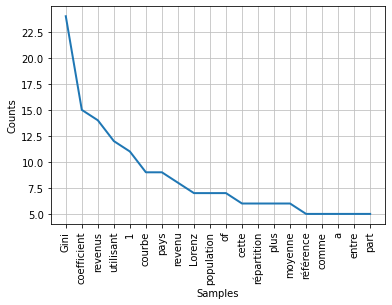

Cet article parle de Gini,coefficient


In [ ]:
import nltk
nltk.download('stopwords')
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re 

#On entre et lit l'URL
response =  urllib.request.urlopen('https://fr.wikipedia.org/wiki/Coefficient_de_Gini')
html = response.read()
soup = BeautifulSoup(html,'html5lib')

#On extrait le texte des balises
text = soup.get_text(strip = True)

#On retire les caractères spéciaux avec re
text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
text = re.sub(r"\&\S*\s", "", text)
text = re.sub(r"\-", "", text)

#On coupe le texte en morceaux
mots = text.split()

#supprimer les mots inutiles (à, le, pour...)
grammaire= stopwords.words('french')
motClef = mots[:]
for K in mots:
    if K.lower() in grammaire:
      motClef.remove(K)

#On compte la fréquence des mots
freq = nltk.FreqDist(motClef)

freq.plot(20, cumulative=False)

#On présente le résultat
dico=freq.unicode_repr()
dico2=dico.split("'")
print("Cet article parle de "+ dico2[1] + ","+ dico2[3] )

With a very slight adaptation, this code can thus be used for automating the referencing of websites, or even give key words in books.